Authors: Michael Gamston

### This Jupyter Notebook file explores iris dataset.


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
iris_df=pd.read_csv('iris_data/iris.data', index_col=False, 
                names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])
iris_df.head()
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#data base has no null entries 
iris_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#Checking what classes we have and the split of data 
iris_df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
#changing our string labeles to intergers, saving them in a dict
labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2,
}
iris_df['Class']= iris_df['Class'].replace('Iris-setosa',0, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-versicolor',1, regex=True)
iris_df['Class']= iris_df['Class'].replace('Iris-virginica',2, regex=True)

#print(iris_df)

/var/folders/sc/s5l9bfs166l8kkt0npztsmsm0000gn/T/ipykernel_98066/2062010568.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df['Class']= iris_df['Class'].replace('Iris-virginica',2, regex=True)


Using the graph below, we can see that most classes are high differnetaiable to the other classes, each having it's own group of correlatable data within the features.
The only outlier to this statement is sepal_width, in which most of the data is within the same bands (overlap).


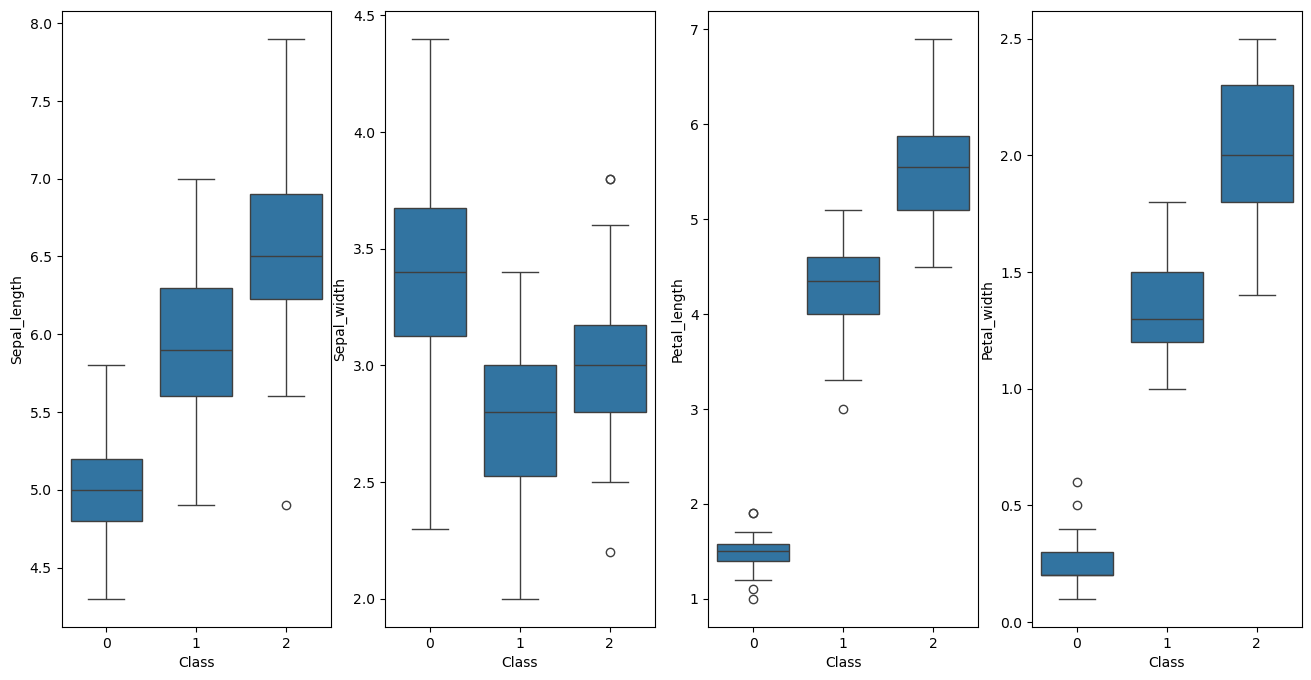

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
axes = axes.ravel()
for i, col in enumerate(iris_df.columns[:4]):
    _= sns.boxplot(y=col, x='Class', data=iris_df, ax=axes[i])

<Axes: title={'center': 'Feature correlation table'}>

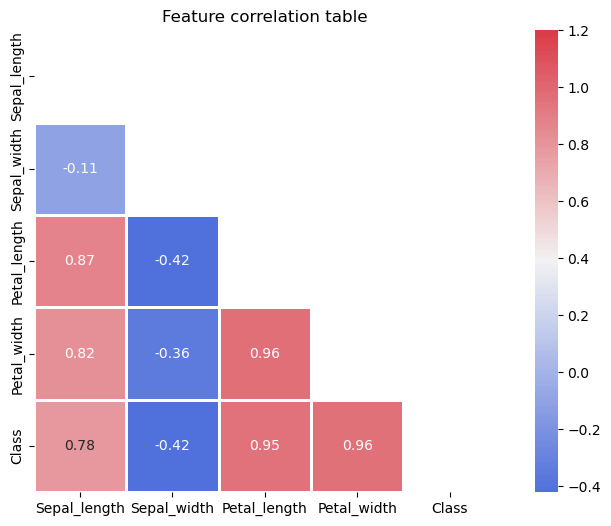

In [15]:
corrMatt = iris_df.corr()

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Feature correlation table')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=True, mask=mask, cmap=cmap, ax=ax, annot=True, linewidths=2)

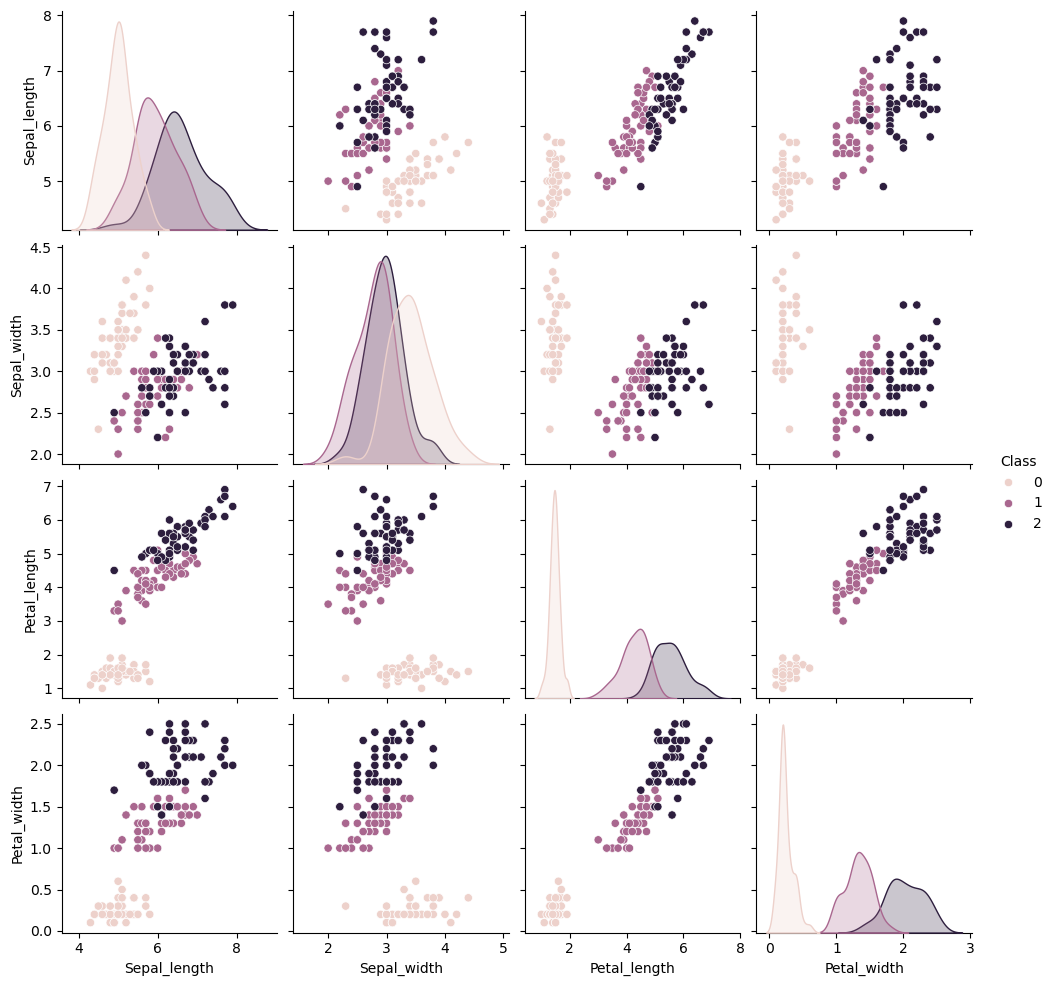

In [16]:
sns.pairplot(iris_df[list(iris_df.columns[:4]) + ['Class']], hue="Class")

## Finding of the data 

Looking at this data, it is clear that Sepal_width could be dropped becuase it does not strongly corrliate to any of the classes.